# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.326192e+01     1.608093e+01
 * time: 0.003072977066040039
     1     6.241762e+01     1.051172e+01
 * time: 0.008926868438720703
     2     5.551894e+01     1.196406e+01
 * time: 0.08090996742248535
     3     4.022977e+01     1.038576e+01
 * time: 0.0993199348449707
     4     3.015420e+01     9.844849e+00
 * time: 0.11801791191101074
     5     2.720204e+01     8.636869e+00
 * time: 0.13407301902770996
     6     1.212689e+01     3.496089e+00
 * time: 0.15021586418151855
     7     7.914212e+00     2.064442e+00
 * time: 0.16368985176086426
     8     7.109219e+00     2.195217e+00
 * time: 0.21408987045288086
     9     6.673006e+00     1.813950e+00
 * time: 0.22752690315246582
    10     6.246577e+00     2.006211e+00
 * time: 0.23839306831359863
    11     5.966094e+00     1.127275e+00
 * time: 0.24948501586914062
    12     5.764890e+00     8.803384e-01
 * time: 0.260361909866333
    13     5.665628e+00     1.118027e+00
 * time: 

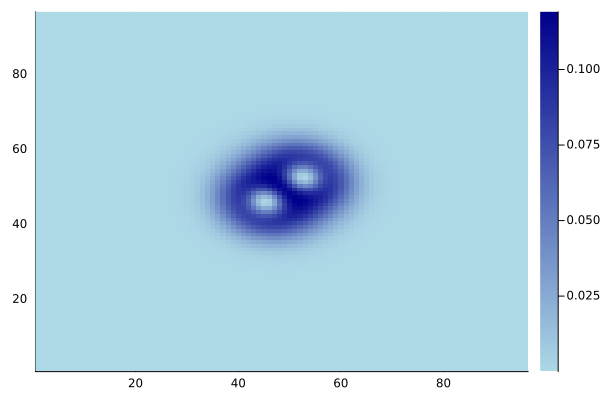

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)